In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('mushrooms.csv');
%store df
df

Stored 'df' (DataFrame)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [22]:
# cleaning up data

df['class'].replace(['p', 'e'], ['poisonous', 'edible'], inplace=True);
df['cap-shape'].replace(['b', 'c', 'x', 'f', 'k', 's'], ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'], inplace=True)
df['cap-surface'].replace(['f', 'g', 'y', 's'], ['fibrous', 'grooves', 'scaly', 'smooth'], inplace=True);
df['cap-color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'], inplace=True);
df['bruises'].replace(['t', 'f'], ['true', 'false'], inplace=True)
df['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'], inplace=True)
df['gill-attachment'].replace(['a', 'd', 'f', 'n'], ['attached', 'descending', 'free', 'notched'], inplace=True);
df['gill-spacing'].replace(['c', 'w', 'd'], ['close', 'crowded', 'distant'], inplace=True);
df['gill-size'].replace(['b', 'n'], ['broad', 'narrow'], inplace=True);
df['gill-color'].replace(['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'], inplace=True);
df['stalk-shape'].replace(['e', 't'], ['enlarging', 'tapering'], inplace=True);
df['stalk-root'].replace(['b', 'c', 'u', 'e', 'z', 'r'], ['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted'], inplace=True);
df['stalk-surface-above-ring'].replace(['f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'], inplace=True);
df['stalk-surface-below-ring'].replace(['f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'], inplace=True);
df['stalk-color-above-ring'].replace(['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'], inplace=True);
df['stalk-color-below-ring'].replace(['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'], inplace=True);
df['veil-type'].replace(['p', 'u'], ['partial', 'universal'], inplace=True);
df['veil-color'].replace(['n', 'o', 'w', 'y'], ['brown', 'orange', 'white', 'yellow'], inplace=True);
df['ring-number'].replace(['n', 'o', 't'], [0, 1, 2], inplace=True);
df['ring-type'].replace(['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'], ['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone'], inplace=True);
df['spore-print-color'].replace(['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'], inplace=True);
df['population'].replace(['a', 'c', 'n', 's', 'v', 'y'], ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'], inplace=True);
df['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'], inplace=True);

# 2480 out of the 8124 entries are missing information about the stalk root. We can either remove 2480 of the entries, or remove the stalk-root column for all 8124 entries. Let's remove the stalk root column from our data. We now have 22 features, 1 of which is whether the mushroom is poisonous or edible. Thereforew, we have 21 features that can help us predict whether a mushroom is poisonous or edible.
# print(df[df['stalk-root'] == '?']);
df.drop(['stalk-root'], axis=1, inplace=True);


# in order to do logistic regression, we must replace values in our target column with numerical values.
# in the class column, we will use 0 for edible and 1 for poisonous classification\

df['class'].replace(['poisonous', 'edible'], [1, 0], inplace=True);

df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convex,smooth,brown,true,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,0,convex,smooth,yellow,true,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,0,bell,smooth,white,true,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,1,convex,scaly,white,true,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,0,convex,smooth,gray,false,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,knobbed,smooth,brown,false,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8120,0,convex,smooth,brown,false,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,1,pendant,buff,several,leaves
8121,0,flat,smooth,brown,false,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8122,1,knobbed,scaly,brown,false,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,1,evanescent,white,several,leaves


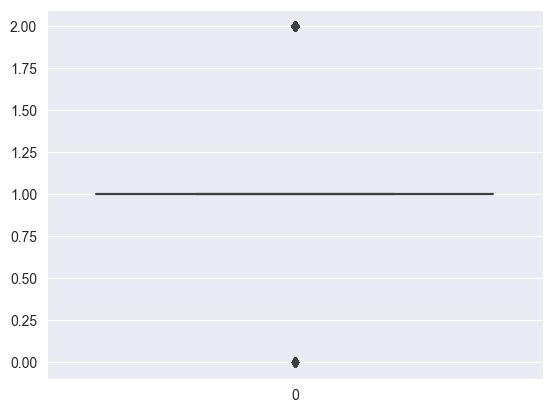

number of mushrooms: 8124
number of poisonous mushrooms: 0
number of edible mushrooms: 0
percent of poisonous mushrooms: 0.0
percent of edible mushrooms: 0.0
{'brown': 2284, 'gray': 1840, 'red': 1500, 'yellow': 1072, 'white': 1040, 'buff': 168, 'pink': 144, 'cinnamon': 44, 'purple': 16, 'green': 16}


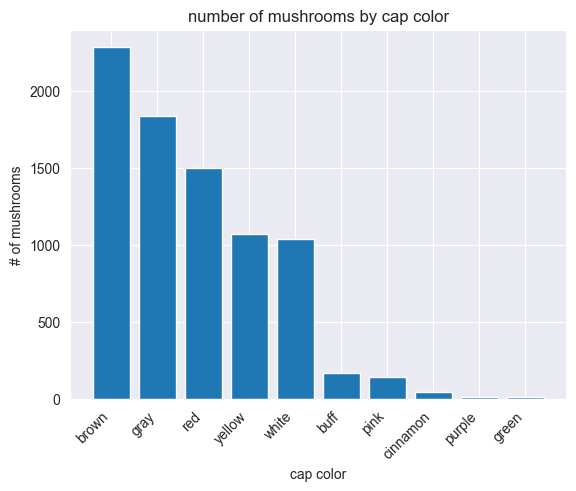

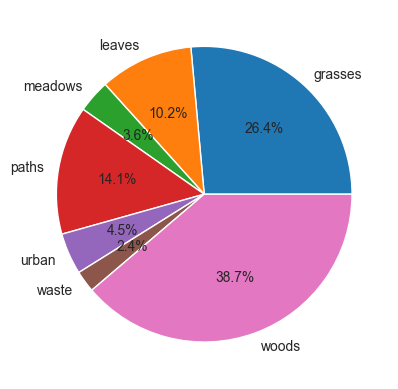

In [23]:
# exploratory data analysis & data visualization


sns.boxplot(df['ring-number']);
plt.show();


poisonous_df = df[df['class'] == 'poisonous'];
edible_df = df[df['class'] == 'edible'];
num_mushrooms = len(df.index);
num_poisonous = len(poisonous_df.index);
num_edible = len(edible_df.index);
percent_poisonous = (num_poisonous / num_mushrooms) * 100
percent_edible = (num_edible / num_mushrooms) * 100

print("number of mushrooms: " + str(num_mushrooms));
print("number of poisonous mushrooms: " + str(num_poisonous));
print("number of edible mushrooms: " + str(num_edible));
print("percent of poisonous mushrooms: " + str(percent_poisonous));
print("percent of edible mushrooms: " + str(percent_edible));
# Approximately 48% of entries are poisonous and 52% are edible, giving us an evenly split dataset.

# Let's visualize our data by some of our traits.

# The first thing you're probably going to notice about a mushroom is its cap color.
cap_color_data = {'brown': (df[df['cap-color'] == 'brown']).shape[0], 'gray': (df[df['cap-color'] == 'gray']).shape[0], 'red': (df[df['cap-color'] == 'red']).shape[0], 'yellow': (df[df['cap-color'] == 'yellow']).shape[0], 'white': (df[df['cap-color'] == 'white']).shape[0], 'buff': (df[df['cap-color'] == 'buff']).shape[0], 'pink': (df[df['cap-color'] == 'pink']).shape[0], 'cinnamon': (df[df['cap-color'] == 'cinnamon']).shape[0], 'purple': (df[df['cap-color'] == 'purple']).shape[0], 'green': (df[df['cap-color'] == 'green']).shape[0]};
print(cap_color_data);
cap_colors = list(cap_color_data.keys());
cap_colors_frequencies = list(cap_color_data.values());
plt.bar(cap_colors, cap_colors_frequencies);
plt.xticks(rotation=45, ha="right")
plt.xlabel('cap color')
plt.ylabel('# of mushrooms')
plt.title('number of mushrooms by cap color')
plt.show()
# As we can see in the bar plot, the majority of mushrooms are brown, making up over 25% of the mushrooms in the dataset. The next contenders are mushrooms with gray and red caps.

# You may be wondering how relevant this information is to you based on your habitat. Let's look at the number of mushrooms in this dataset based on habitat.
habitat_data = {'grasses': (df[df['habitat'] == 'grasses']).shape[0], 'leaves': (df[df['habitat'] == 'leaves']).shape[0], 'meadows': (df[df['habitat'] == 'meadows'] ).shape[0], 'paths': (df[df['habitat'] == 'paths']).shape[0], 'urban': (df[df['habitat'] == 'urban']).shape[0], 'waste': (df[df['habitat'] == 'waste']).shape[0], 'woods': (df[df['habitat'] == 'woods']).shape[0]};
plt.pie(list(habitat_data.values()), labels=list(habitat_data.keys()), autopct='%1.1f%%');
plt.show()
# Over a third of the mushrooms in our dataset are found in the woods, and about a quarter are found in grasses, so if you're shrooming near these types of habitats, you're in luck!

The intercept b0 =  [1.43682111]
The coefficient b1 =  [[ 3.00050933e-01  5.91293230e-01 -1.49518462e-01 -4.46023384e-02
  -1.44183910e-01 -5.51476844e-01 -6.96748287e-01  7.53379564e-01
  -1.40110645e-01  8.50419766e-02 -4.29924015e-01  1.03448938e+00
  -7.29013798e-01  5.19728055e-02 -4.24871199e-01  1.00380652e+00
  -4.85696874e-01 -3.81768416e-02  4.12423511e-01 -3.93446878e-01
  -4.95171845e-01  4.96734453e-01 -3.35439754e+00 -3.33140615e+00
   3.45155636e+00  7.38184977e-01  3.41181558e+00  3.35934952e-01
  -3.98886679e+00  1.98592483e+00  7.52816394e-01 -2.44446960e-01
   2.46009568e-01  1.05719956e+00 -1.05563695e+00 -2.18497921e+00
   2.18654182e+00 -5.13507811e-01 -6.03878234e-01  1.53925699e+00
   1.41709973e-01  8.29315087e-02  6.99491378e-01 -1.44962260e-01
  -3.86501946e-01 -1.43016091e-01 -6.17089925e-01 -1.49734034e-01
   9.68630577e-02  3.62529671e-01 -3.60967062e-01 -4.08659078e-01
   1.35925188e-01  1.33580993e+00 -1.06151343e+00 -1.08977062e+00
   9.63004596e-01  3.

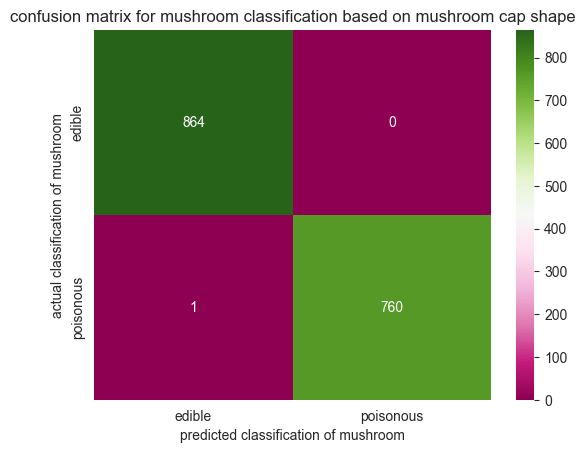

0.9993846153846154
0.022180709777918466


In [24]:
# analysis, hypothesis testing, and ML

# let's create a new dataframe variable as we will be editing the columns
df_for_ml = df;
# dependent variable -- class


# before we can do our logistic regression, our dependent variables must be numerical, but we have them here as strings!
# we shouldn't use label encoding here because our numerical values can easily be misinterpreted by the logistic regression algorithm! let's use one hot encoding instead.
y = df_for_ml['class'];
df_for_ml = df_for_ml.drop(['class'], axis=1);
x = pd.get_dummies(df_for_ml, columns=df_for_ml.columns.values);

# print(x);

# first let's try to use all our variables and see what sort of logistic regression we get.
# first we need to turn each categorical variable into a one hot encoding

# we will use 80 percent of the data for training, and 20 percent of the data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2);

# implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)
# print the regression coefficients
print("The intercept b0 = ", modelLogistic.intercept_)
print("The coefficient b1 = ", modelLogistic.coef_)

# make prediction for the test data
y_pred = modelLogistic.predict(x_test)

#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='PiYG', fmt='g');
ax.set_title('confusion matrix for mushroom classification based on mushroom cap shape');
ax.set_xlabel('predicted classification of mushroom');
ax.set_ylabel('actual classification of mushroom');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['edible','poisonous']);
ax.yaxis.set_ticklabels(['edible','poisonous']);
## Display the visualization of the Confusion Matrix.
plt.show();

# when we use only mushroom cap shape to predict whether mushrooms are poisonous or edible, we get a true positive of 126.
# that means that out of the 788 poisonous mushrooms in our testing data set, we correctly predict that the mushroom is poisonous roughly 16% of the time! Which means that if someone trusted our model and came across a poisonous mushroom, our model would tell them that mushroom is edible 84% of the time! NOT GOOD!!!
# On the bright side, our true negative is  790. This means that when the actual mushroom is edible, our model predicts it as edible 790/837 = 94% of the time!! :) But, given our context, it is more important for us to have a higher true positive than a true negative. This is because it's more important that we correctly predict poisonous mushrooms than it is that we correctly predict edible mushrooms, since poisonous mushrooms are deadly.

# let's use binary cross entropy (aka log loss) to measure the difference between predicted probabilities and true classifications of mushrooms

AccuracyScore = accuracy_score(y_test, y_pred);
LogLoss = log_loss(y_test, y_pred);
print(AccuracyScore);
print(LogLoss);

# Our model correctly predicts the mushroom class 56% of the time -- only about half the time! :(
# Furthermore, our log loss value is over 15!! A higher log loss value means the prediction probability is further away from the corresponding true value. 15.7 is a pretty high log loss value, and as seen by the chart from the ML glossary, means our predicted probability is wayyyyy too low. This model for classifying mushrooms as poisonous or edible won't do!

# Let's see how our model works when we use other mushroom traits to predict whether they are poisonous or edible

# Let's try out logistic regression models on mushroom traits until we get a true positive of 90% of higher, or run out of traits